In [1]:
import pandas as pd
df=pd.read_csv('customer_data.csv')
df
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn import preprocessing
from sklearn.preprocessing import scale
import sklearn.metrics as sm
from sklearn import datasets
from sklearn.metrics import confusion_matrix,classification_report
df

identifierHash  type     country language  socialNbFollowers  \
0     -7279641312655250028  user  Etats-Unis       en                  3   
1     -1456013578740053406  user   Allemagne       de                  3   
2      9006282053848196165  user       Suède       en                  3   
3     -7154634866120535654  user     Turquie       en                  3   
4      2858299215060733023  user      France       en                  3   
...                    ...   ...         ...      ...                ...   
98908 -5324380437900495747  user  Etats-Unis       fr                  3   
98909 -5607668753771114442  user      France       fr                  3   
98910   350630276238833248  user    Belgique       en                  3   
98911  2006580738726207028  user      Italie       it                  3   
98912 -7621316584087253691  user      Guinée       fr                  3   

       socialNbFollows  socialProductsLiked  productsListed  productsSold  \
0                    8                    0               0             0   
1                    8                    0               0             0   
2                    8                    0               0             0   
3                    8                    0               0             0   
4                    8                    0               0             0   
...                ...                  ...             ...           ...   
98908                8                    0               0             0   
98909                8                    0               0             0   
98910                8                    0               0             0   
98911                8                    0               0             0   
98912                8                    0               0             0   

       productsPassRate  ...  civilityTitle  hasAnyApp hasAndroidApp  \
0                   0.0  ...            mrs      False         False   
1                   0.0  ...            mrs      False         False   
2                   0.0  ...             mr       True         False   
3                   0.0  ...            mrs      False         False   
4                   0.0  ...             mr       True         False   
...                 ...  ...            ...        ...           ...   
98908               0.0  ...             mr      False         False   
98909               0.0  ...             mr       True         False   
98910               0.0  ...             mr       True          True   
98911               0.0  ...            mrs      False         False   
98912               0.0  ...             mr       True         False   

       hasIosApp hasProfilePicture  daysSinceLastLogin  seniority  \
0          False              True                 709       3205   
1          False              True                 709       3205   
2           True              True                 689       3205   
3          False              True                 709       3205   
4           True              True                 709       3205   
...          ...               ...                 ...        ...   
98908      False              True                 708       3204   
98909       True              True                 695       3204   
98910      False              True                 520       3204   
98911      False              True                 267       3204   
98912       True              True                 561       3204   

       seniorityAsMonths  seniorityAsYears  countryCode  
0                 106.83               8.9           us  
1                 106.83               8.9           de  
2                 106.83               8.9           se  
3                 106.83               8.9           tr  
4                 106.83               8.9           fr  
...                  ...               ...          ...  
98908             106.80               8.9           us  
98909           

In [2]:
#check whether the data provided in customer_data contains any redundant information or not
df['seniorityAsYears'].unique()

array([8.9 , 8.89, 8.88, 7.94, 7.93, 7.92])

In [3]:
#Performing one hot encoding over the categorical data
from sklearn.preprocessing import OneHotEncoder 
X = np.array(df['country']).reshape(-1,1)
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(X)
onehot_country = enc.transform(X).toarray()
onehot_country = np.array(onehot_country)
normalized_onehot_country = preprocessing.normalize(onehot_country)
normalized_onehot_country
print(normalized_onehot_country.shape)

(98913, 200)


In [4]:
from sklearn.preprocessing import OneHotEncoder 
X = np.array(df['language']).reshape(-1,1)
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(X)
onehot_language = enc.transform(X).toarray()
onehot_language = np.array(onehot_language)
normalized_onehot_language = preprocessing.normalize(onehot_language)
normalized_onehot_language
print(normalized_onehot_language.shape)


(98913, 5)


In [5]:
from sklearn.preprocessing import OneHotEncoder 
X = np.array(df['gender']).reshape(-1,1)
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(X)
onehot_gender = enc.transform(X).toarray()
print(onehot_gender.shape)
onehot_gender = np.array(onehot_gender)
normalized_onehot_gender = preprocessing.normalize(onehot_gender)
normalized_onehot_gender


(98913, 2)


array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]])

In [6]:
from sklearn.preprocessing import OneHotEncoder 
X = np.array(df['civilityTitle']).reshape(-1,1)
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(X)
onehot_civilityTitle = enc.transform(X).toarray()
print(onehot_civilityTitle.shape)
onehot_civilityTitle = np.array(onehot_civilityTitle)
normalized_onehot_civilityTitle = preprocessing.normalize(onehot_civilityTitle)
normalized_onehot_civilityTitle


(98913, 3)


array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.]])

In [7]:
from sklearn.preprocessing import OneHotEncoder 
X = np.array(df['countryCode']).reshape(-1,1)
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(X)
onehot_countryCode = enc.transform(X).toarray()
print(onehot_countryCode.shape)
onehot_civilityTitle = np.array(onehot_countryCode)
normalized_onehot_countryCode = preprocessing.normalize(onehot_countryCode)
normalized_onehot_countryCode



(98913, 199)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [8]:
#customer_data after removing categorical data by drop respective columns
cd=df.drop(columns=['identifierHash','type','country','language','gender','civilityTitle','countryCode'])
cd

socialNbFollowers  socialNbFollows  socialProductsLiked  \
0                      3                8                    0   
1                      3                8                    0   
2                      3                8                    0   
3                      3                8                    0   
4                      3                8                    0   
...                  ...              ...                  ...   
98908                  3                8                    0   
98909                  3                8                    0   
98910                  3                8                    0   
98911                  3                8                    0   
98912                  3                8                    0   

       productsListed  productsSold  productsPassRate  productsWished  \
0                   0             0               0.0               0   
1                   0             0               0.0               0   
2                   0             0               0.0               0   
3                   0             0               0.0               0   
4                   0             0               0.0               0   
...               ...           ...               ...             ...   
98908               0             0               0.0               0   
98909               0             0               0.0               0   
98910               0             0               0.0               0   
98911               0             0               0.0               0   
98912               0             0               0.0               0   

       productsBought  civilityGenderId  hasAnyApp  hasAndroidApp  hasIosApp  \
0                   0                 2      False          False      False   
1                   0                 2      False          False      False   
2                   0                 1       True          False       True   
3                   0                 2      False          False      False   
4                   0                 1       True          False       True   
...               ...               ...        ...            ...        ...   
98908               0                 1      False          False      False   
98909               0                 1       True          False       True   
98910               0                 1       True           True      False   
98911               0                 2      False          False      False   
98912               0                 1       True          False       True   

       hasProfilePicture  daysSinceLastLogin  seniority  seniorityAsMonths  \
0                   True                 709       3205             106.83   
1                   True                 709       3205             106.83   
2                   True                 689       3205             106.83   
3                   True                 709       3205             106.83   
4                   True                 709       3205             106.83   
...                  ...                 ...        ...                ...   
98908               True                 708       3204             106.80   
98909               True                 695       3204             106.80   
98910               True                 520       3204             106.80   
98911               True                 267       3204             106.80   
98912               True                 561       3204             106.80   

       seniorityAsYears  
0                   8.9  
1                   8.9  
2                   8.9  
3                   8.9  
4                   8.9  
...                 ...  
98908               8.9  
98909               8.9  
98910               8.9  
98911               8.9  
98912               8.9  

[98913 rows x 17 columns]

In [9]:
#we are not considering identifierHash as its just some serial number given to the customers and our assumption is that it should not be considered as data as it is just for the purpose of identification
#identifierHash = np.array(cd['identifierHash'])
#normalized_identifierHash = preprocessing.normalize([identifierHash])
#normalized_identifierHash

In [10]:
#Normalization of the data such that each column has zero mean and unit variance
socialNbFollowers = np.array(cd['socialNbFollowers'])
normalized_socialNbFollowers = preprocessing.normalize([socialNbFollowers])
normalized_socialNbFollowers

array([[0.00184076, 0.00184076, 0.00184076, ..., 0.00184076, 0.00184076,
        0.00184076]])

In [11]:
socialNbFollows = np.array(cd['socialNbFollows'])
normalized_socialNbFollows = preprocessing.normalize([socialNbFollows])
normalized_socialNbFollows

array([[0.00047539, 0.00047539, 0.00047539, ..., 0.00047539, 0.00047539,
        0.00047539]])

In [12]:
socialProductsLiked = np.array(cd['socialProductsLiked'])
normalized_socialProductsLiked = preprocessing.normalize([socialProductsLiked])
normalized_socialProductsLiked

array([[0., 0., 0., ..., 0., 0., 0.]])

In [13]:
productsListed = np.array(cd['productsListed'])
normalized_productsListed = preprocessing.normalize([productsListed])
normalized_productsListed

array([[0., 0., 0., ..., 0., 0., 0.]])

In [14]:
productsSold = np.array(cd['productsSold'])
normalized_productsSold = preprocessing.normalize([productsSold])
normalized_productsSold
print(normalized_productsSold.shape)

(1, 98913)


In [15]:
productsPassRate = np.array(cd['productsPassRate'])
normalized_productsPassRate = preprocessing.normalize([productsPassRate])
normalized_productsPassRate

array([[0., 0., 0., ..., 0., 0., 0.]])

In [16]:
productsWished = np.array(cd['productsWished'])
normalized_productsWished = preprocessing.normalize([productsWished])
normalized_productsWished

array([[0., 0., 0., ..., 0., 0., 0.]])

In [17]:
productsBought = np.array(cd['productsBought'])
normalized_productsBought = preprocessing.normalize([productsBought])
normalized_productsBought

array([[0., 0., 0., ..., 0., 0., 0.]])

In [18]:
civilityGenderId = np.array(cd['civilityGenderId'])
normalized_civilityGenderId = preprocessing.normalize([civilityGenderId])
normalized_civilityGenderId

array([[0.0034844, 0.0034844, 0.0017422, ..., 0.0017422, 0.0034844,
        0.0017422]])

In [19]:
hasAnyApp = np.array(cd['hasAnyApp'])
normalized_hasAnyApp= preprocessing.normalize([hasAnyApp])
normalized_hasAnyApp

array([[0.        , 0.        , 0.00618109, ..., 0.00618109, 0.        ,
        0.00618109]])

In [20]:
hasAndroidApp = np.array(cd['hasAndroidApp'])
normalized_hasAndroidApp = preprocessing.normalize([hasAndroidApp])
normalized_hasAndroidApp

array([[0.        , 0.        , 0.        , ..., 0.01440527, 0.        ,
        0.        ]])

In [21]:
hasIosApp = np.array(cd['hasIosApp'])
normalized_hasIosApp = preprocessing.normalize([hasIosApp])
normalized_hasIosApp

array([[0.        , 0.        , 0.00681567, ..., 0.        , 0.        ,
        0.00681567]])

In [22]:
hasProfilePicture = np.array(cd['hasProfilePicture'])
normalized_hasProfilePicture = preprocessing.normalize([hasProfilePicture])
normalized_hasProfilePicture

array([[0.00321051, 0.00321051, 0.00321051, ..., 0.00321051, 0.00321051,
        0.00321051]])

In [23]:
daysSinceLastLogin = np.array(cd['daysSinceLastLogin'])
normalized_daysSinceLastLogin = preprocessing.normalize([daysSinceLastLogin])
normalized_daysSinceLastLogin

array([[0.00030315, 0.00030315, 0.0002946 , ..., 0.00022234, 0.00011416,
        0.00023987]])

In [24]:
seniority = np.array(cd['seniority'])
normalized_seniority = preprocessing.normalize([seniority])
normalized_seniority

array([[0.00332117, 0.00332117, 0.00332117, ..., 0.00332013, 0.00332013,
        0.00332013]])

In [25]:
seniorityAsMonths = np.array(cd['seniorityAsMonths'])
normalized_seniorityAsMonths = preprocessing.normalize([seniorityAsMonths])
normalized_seniorityAsMonths

array([[0.00332107, 0.00332107, 0.00332107, ..., 0.00332014, 0.00332014,
        0.00332014]])

In [26]:
seniorityAsYears = np.array(cd['seniorityAsYears'])
normalized_seniorityAsYears = preprocessing.normalize([seniorityAsYears])
normalized_seniorityAsYears

array([[0.00332014, 0.00332014, 0.00332014, ..., 0.00332014, 0.00332014,
        0.00332014]])

In [27]:
#concatenation of all preprocessed data which has now only numerical normalized data 
data=np.concatenate((normalized_onehot_language,normalized_socialNbFollowers.T,normalized_socialNbFollows.T,normalized_socialProductsLiked.T,normalized_socialProductsLiked.T,normalized_productsSold.T,normalized_productsPassRate.T,normalized_productsWished.T,normalized_productsBought.T,normalized_civilityGenderId.T,normalized_onehot_gender,normalized_onehot_civilityTitle,normalized_hasAnyApp.T,normalized_hasAndroidApp.T,normalized_hasIosApp.T,normalized_hasProfilePicture.T,normalized_daysSinceLastLogin.T,normalized_seniority.T,normalized_seniorityAsMonths.T,normalized_seniorityAsYears.T), axis=1)
data

array([[0.        , 1.        , 0.        , ..., 0.00332117, 0.00332107,
        0.00332014],
       [1.        , 0.        , 0.        , ..., 0.00332117, 0.00332107,
        0.00332014],
       [0.        , 1.        , 0.        , ..., 0.00332117, 0.00332107,
        0.00332014],
       ...,
       [0.        , 1.        , 0.        , ..., 0.00332013, 0.00332014,
        0.00332014],
       [0.        , 0.        , 0.        , ..., 0.00332013, 0.00332014,
        0.00332014],
       [0.        , 0.        , 0.        , ..., 0.00332013, 0.00332014,
        0.00332014]])

In [32]:
#Implementation of PCA over the data
# we have not considered country and country code as we had memory eroor due to large dataset

from sklearn.decomposition import PCA
import numpy as np
k = 10 # target dimension(s)
pca = PCA(k) # Create a new PCA instance
print("Data: ", data)
projected= pca.fit_transform(data)
print("Reduced: ", projected) # fit and transform
print("Explained variance:",pca.explained_variance_ratio_)


Data:  [[0.         1.         0.         ... 0.00332117 0.00332107 0.00332014]
 [1.         0.         0.         ... 0.00332117 0.00332107 0.00332014]
 [0.         1.         0.         ... 0.00332117 0.00332107 0.00332014]
 ...
 [0.         1.         0.         ... 0.00332013 0.00332014 0.00332014]
 [0.         0.         0.         ... 0.00332013 0.00332014 0.00332014]
 [0.         0.         0.         ... 0.00332013 0.00332014 0.00332014]]
Reduced:  [[-5.15023132e-01 -5.02630397e-01 -1.08475783e-01 ...  1.33315906e-03
  -1.40074478e-03 -2.94114485e-05]
 [-4.22025728e-01  3.29900556e-01  6.90732424e-01 ...  1.68599415e-03
  -1.85662544e-03 -1.14224789e-04]
 [ 1.47537329e+00 -6.96898637e-01 -1.22355762e-01 ... -3.19069699e-03
   5.04930658e-03 -6.63514083e-04]
 ...
 [ 1.47537446e+00 -6.96890827e-01 -1.22351105e-01 ... -2.99133121e-03
   5.29032828e-03  2.39273737e-04]
 [-4.27234645e-01  3.37044895e-01  7.63510327e-01 ...  2.43764168e-03
  -2.05242127e-03  2.95577076e-04]
 [ 1.6097

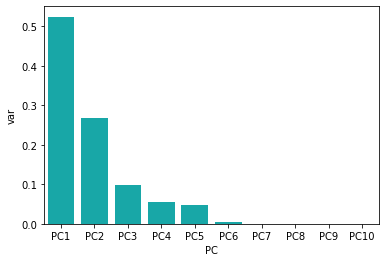

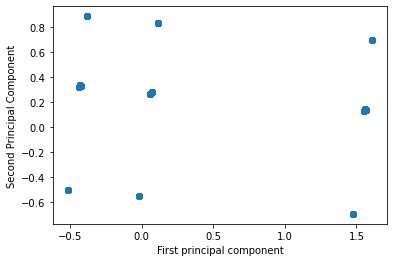

In [33]:
#data visualisation
import seaborn as sns

pc_df = pd.DataFrame(data = pca.fit_transform(data), columns = ['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'])


analysis_df = pd.DataFrame({'var':pca.explained_variance_ratio_, 'PC':['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10']})

sns.barplot(x='PC',y="var", 
           data=analysis_df, color="c");

plt.figure()


plt.scatter(projected[:,0],projected[:,1])
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')


plt.show()


In [39]:
loading_scores=pd.Series(pca.components_[0],name='most active users')
sorted_loading_scores=loading_scores.abs().sort_values(ascending=False)
print(sorted_loading_scores)#most active users #observeed range
#xxx=range[0:6825]
user_df=pd.Series.to_frame(sorted_loading_scores[0:6825])
print(user_df)

18    4.976701e-01
17    4.975738e-01
14    4.975738e-01
15    4.975738e-01
1     7.849279e-02
3     5.590288e-02
0     1.450462e-02
4     9.295704e-03
2     1.210420e-03
13    8.667053e-04
19    2.955384e-04
21    2.389072e-04
20    1.943283e-04
16    9.625955e-05
11    3.752753e-05
7     1.830521e-05
8     1.830521e-05
5     1.574326e-05
23    1.567379e-05
12    1.511039e-05
10    6.123751e-06
6     5.057860e-06
22    4.814563e-06
9     3.665812e-06
24    5.659299e-07
25    5.659285e-07
26    5.658751e-07
Name: most active users, dtype: float64
    most active users
18       4.976701e-01
17       4.975738e-01
14       4.975738e-01
15       4.975738e-01
1        7.849279e-02
3        5.590288e-02
0        1.450462e-02
4        9.295704e-03
2        1.210420e-03
13       8.667053e-04
19       2.955384e-04
21       2.389072e-04
20       1.943283e-04
16       9.625955e-05
11       3.752753e-05
7        1.830521e-05
8        1.830521e-05
5        1.574326e-05
23       1.567379e-05
12     